**Factors Influencing Flight Ticket Prices: An Analysis using ANOVA Test and Price Prediction with ExtraTreesRegressor**

**Abstract**
In this study, we analyze flight booking data obtained from the "Ease My Trip" website. Factors influencing the price of flight reservations are explored through Exploratory Data Analysis (EDA) and predictive modeling. The analysis reveals significant factors impacting ticket prices, although the overall effect is relatively minor.

Key variables influencing ticket prices are identified through Analysis of Variance (ANOVA), considering the multitude of variables affecting the outcome. Prediction of ticket prices is accomplished using the ExtraTreesRegressor model, demonstrating an impressive accuracy of 97.95%. Additionally, data preprocessing is performed using RobustScaler to scale the data, mitigating the impact of outliers and reducing overfitting. This step enhances the model's performance by minimizing data dispersion and preventing overfitting.

The results of this analysis provide valuable insights into the factors affecting flight ticket prices, contributing to a better understanding of the dynamics in the airline industry. The predictive model's high accuracy underscores its potential for practical applications in forecasting flight ticket prices.

**Analysis of Variance (ANOVA) ,  ExtraTreesRegressor ,  RobustScaler**

**Introduction: Analyzing a dataset derived from the "Ease My Trip" website's flight bookings, this study employs various statistical hypothesis tests to extract meaningful insights. The objective is to provide passengers with information to identify the most cost-effective prices and comprehend the principles governing flight ticket pricing during reservations. This includes factors such as the airline, the lead time before the flight, and the class of service. A thorough examination of this data will contribute to the discovery of valuable patterns that can significantly benefit passengers.**

This dataset contains information about flight booking options from the Easemytrip website for domestic flights between the six main cities in India. The dataset comprises a total of 300,152 data points with 11 features, including airline, flight, source city, departure time, stops, arrival time, destination city, class, duration, days left, and price. The data was collected over a period of 50 days, ranging from February 11th to March 31st, 2022..

Objective: The main objectives of this study are to identify factors influencing flight ticket prices and predict ticket prices. The analysis will involve utilizing Analysis of Variance (ANOVA) to select the top six factors with the most significant impact on prices. This is done to enhance accuracy. Additionally, prediction will be performed using the ExtraTreesRegressor model, and the data will be preprocessed with RobustScaler to reduce dataset variability in price prediction.

The specific explorations within the dataset include:

Impact of Airlines on Ticket Prices:
-Investigating how different airlines influence ticket prices.
Effect of Lead Time on Ticket Prices:
-Examining whether booking tickets well in advance or closer to the departure date affects ticket prices.
Price Variation with Source and Destination:
-Analyzing if ticket prices vary based on the source and destination locations.
Time of Departure and Arrival Impact on Prices:
-Understanding how the departure and arrival times affect flight ticket prices.
Identification of Top Influencing Factors on Prices:
-Determining the factors that have the highest impact on flight ticket prices.
Duration of Flight and its Impact:
-Analyzing how the duration of the flight influences ticket prices and if it affects the number of stops.
Effect of Layovers on Ticket Prices:
-Investigating how layovers impact flight ticket prices.


# Exploration of Data


Importing Flight Price Prediction Data

In [ ]:
import pandas as pd
data_flight=pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
data_flight

# Data Headline

In [ ]:
data_flight.head()

# Data flight info

In [ ]:
data_flight.info()

# Data describe

In [ ]:
data_flight.describe()

# To drop unnecessary data 

In [ ]:
data_flight_drop = data_flight.drop(columns=['Unnamed: 0','flight'])
data_flight_drop

# check for missing values (null values) in the data using Pandas

In [ ]:
data_flight.isnull().sum()

# To summarize the relationship between the 'airline' column and the 'price' column

In [ ]:
result_airline = data_flight_drop.groupby('airline')['price'].agg(['mean', 'max', 'min', 'std','count'])
result_airline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

plt.title("Price distribution by airline")

sns.barplot(x='airline', y='price', data=data_flight,palette="Set2")

plt.ylabel("Price")

plt.xticks(rotation=45)

# To summarize the relationship between the 'airline' column and the 'price' column, while also considering the 'class' column

In [ ]:
result_airline_class = data_flight_drop.groupby(['airline', 'class'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_airline_class

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))

plt.title("Price distribution by airline")

sns.barplot(x='airline', y='price', data=data_flight,palette="Set2",hue='class')

plt.ylabel("Price")

plt.xticks(rotation=45)

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))

plt.title("Price distribution by airline and class")

sns.violinplot(x='airline', y='price', data=data_flight, hue='class', split=True, palette="Set2")

plt.ylabel("Price")

plt.xticks(rotation=45)

plt.show()

"In the context of airline and class, they have an impact on flight prices. For Economy class, the airline with the highest average price is Vistara, while the airline with the lowest average price is AirAsia.

In the Business class, the airline with the highest average price is Vistara, and the airline with the second lowest average price is Air India. It's worth noting that there are only two airlines in the Business class."

# To summarize the relationship between the 'stop' column and the 'price' column, while also considering the 'class' column

In [ ]:
result_stops = data_flight_drop.groupby(['stops','class'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_stops

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

plt.title("Price distribution by airline")

sns.barplot(x='stops', y='price', data=data_flight,palette="Set2",hue='class')

plt.ylabel("Price")

plt.xticks(rotation=45)

In [ ]:
result_stops = data_flight_drop.groupby(['stops'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_stops

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

plt.title("Price distribution by airline")

sns.barplot(x='stops', y='price', data=data_flight,palette="Set2")

plt.ylabel("Price")

plt.xticks(rotation=45)

In [ ]:
result_stops = data_flight_drop.groupby(['stops'])['duration'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_stops

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(data=data_flight_drop, x="stops", y="duration",palette="Set2")

"In the overall overview of stops, it impacts the flight ticket prices, where the average prices follow the sequence from lowest to highest for 'zero,' 'two_or_more,' and 'one.'

However, when segmented by class, the number of stops affects the ticket prices differently for Economy and Business classes. Specifically, for Economy and Business classes, the impact follows the sequence 'zero,' 'one,' 'two_or_more.' This observation is attributed to the influence of class-specific price dynamics.

Furthermore, the duration of the flight has an impact on the number of stops, with the order of influence being 'zero,' 'one,' 'two_or_more.'

# To summarize the relationship between the 'days_left' column and the 'price' column

In [ ]:
result_days_left = data_flight_drop.groupby(['days_left','class'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_days_left

In [ ]:
import numpy as np
sns.set_style("whitegrid")
sns.lineplot(data=data_flight, x="days_left", y="price", estimator=np.mean)

In [ ]:
sns.lineplot(x='days_left', y='price', hue='airline', data=data_flight_drop)
plt.show()

"In the context of booking days before the departure, early bookings tend to result in lower prices, while last-minute bookings, particularly within a few days before the flight, lead to higher prices. However, for business class, there is a trend of lower prices specifically within the 1-2 days before the flight."

# To explore the relationship between 'source_city' and 'destination_city' concerning 'price'

In [ ]:
result_source_sourecity_destination_city = data_flight_drop.groupby(['source_city','destination_city'])['price'].agg(['mean', 'max', 'min', 'std', 'count']).reset_index()
result_source_sourecity_destination_city

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=data_flight_drop, col_wrap=3)

# To summarize the relationship between 'duration' and 'price'

In [ ]:
result_duration = data_flight_drop.groupby('duration')['price'].agg(['mean', 'max', 'min', 'std','count'])
result_duration

In [ ]:
sns.jointplot(data=data_flight_drop,x='duration',y='price', kind='reg')

In [ ]:
sns.lmplot(data=data_flight_drop, x='duration', y='price', hue='class', height=6,palette="Set2")
plt.show()

"In the 'duration' section, there is a linear relationship with 'price,' meaning that as the duration increases, the majority of the data points tend to exhibit higher prices as well."

# To summarize the relationship between 'departure_time','arrival_time and 'price'

In [ ]:
result_departure_time = data_flight_drop.groupby('departure_time')['price'].agg(['mean', 'max', 'min', 'std','count'])
result_departure_time

In [ ]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.barplot(data=data_flight_drop, x="departure_time", y="price",palette="Set2")

In [ ]:
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.barplot(data=data_flight_drop, x="arrival_time", y="price",palette="Set2")

summarize the relationship between 'departing' (departure time) and 'arriving' (arrival time) concerning 'price' and have observed that prices tend to be higher during the 'Night' period and lower during 'Late Night', you can use the following approach:

In [ ]:
data_flight_drop

## Heat map numeric

In [ ]:
numeric_columns = data_flight_drop.select_dtypes(include='number')

plt.figure(figsize=(14, 7))

plt.title("Heatmap of Numeric Columns")

sns.heatmap(data=numeric_columns.corr(), annot=True, cmap='viridis')

plt.show()

"In this heatmap, it is evident that 'duration' has a positive correlation with 'price,' implying that higher durations tend to result in higher prices, while lower durations are associated with lower prices. On the other hand, 'days_left' shows a negative correlation with 'price,' signifying that the farther in advance a booking is made from the departure date, the lower the associated booking price. Conversely, booking closer to the departure date tends to result in higher prices."

# Data processing





## Label encoding is a technique used to convert categorical data

In [ ]:
from sklearn import preprocessing

for col in data_flight_drop.select_dtypes(include=['object']).columns:
    print(f"{col}: {data_flight_drop[col].unique()}")

for col in data_flight_drop.select_dtypes(include=['object']).columns:

    data_flight_drop[col].fillna('unknown', inplace=True)

    data_flight_drop[col] = data_flight_drop[col].astype(str)

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(data_flight_drop[col].unique())

    data_flight_drop[col] = label_encoder.transform(data_flight_drop[col])

    print(f"{col}: {data_flight_drop[col].unique()}")

In [ ]:
data_flight_drop

In [ ]:
data_flight_drop.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(data_flight_drop.corr(), fmt='.2f',annot=True, cmap='coolwarm')

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']
airline: [4 0 5 2 3 1]
source_city: [2 5 0 4 3 1]
departure_time: [2 1 4 0 5 3]
stops: [2 0 1]
arrival_time: [5 4 1 0 2 3]
destination_city: [5 0 4 3 1 2]
class: [1 0]

"In this heatmap, it is evident that 'duration' has a positive correlation with 'price,' indicating that higher durations tend to result in higher prices, while lower durations are associated with lower prices. On the other hand, 'days_left' shows a negative correlation with 'price,' signifying that the farther in advance a booking is made from the departure date, the lower the associated booking price. Conversely, booking closer to the departure date tends to result in higher prices.

The 'class' variable exhibits a negative correlation with 'price.' In this context, label encoding has been applied, where 'Economy' is represented by 1, and 'Business' is represented by 0. This implies that choosing 'Business' class is associated with higher prices, following the numerical order assigned by label encoding."

# The selection of the top 6 factors influencing prices using the Lasso model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assuming you have already defined Y and X
Y = data_flight_drop["price"]
X = data_flight_drop.drop(["price"], axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features (recommended for LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LASSO model
alpha = 0.1  # You can adjust the regularization strength
lasso_model = Lasso(alpha=alpha)

# Fit the LASSO model to the training data
lasso_model.fit(X_train_scaled, Y_train)

# Get the top 6 selected features (non-zero coefficients)
top_6_features_lasso = [feature for feature, coef in sorted(zip(X.columns, lasso_model.coef_), key=lambda x: abs(x[1]), reverse=True)[:6]]

print("Top 6 Selected Features (LASSO):", top_6_features_lasso)

In [ ]:
top_6_features_lasso = [col for col in data_flight_drop.columns if col not in top_6_features_lasso and col != 'price']
data_flight_drop.drop(top_6_features_lasso, axis=1, inplace=True)
data_flight_drop

# Model Evaluation

# **Model prediction**

# Linear Regression

In [ ]:
X=data_flight_drop.drop(columns='price')
Y=data_flight_drop['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 7)

In [ ]:
x_train=data_flight_drop.drop(columns='price')
y_train=data_flight_drop['price']
x_test=data_flight_drop.drop(columns='price')
y_test=data_flight_drop['price']

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_ET = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_ET.fit(x_train,y_train)

In [ ]:
y_pred_ET=model_ET.predict(x_test)
y_pred_ET

In [ ]:
mse_ET = mean_squared_error(y_test, y_pred_ET)
mae_ET = mean_absolute_error(y_test, y_pred_ET)
rmse_ET = mean_squared_error(y_test, y_pred_ET, squared=False)
r2_ET= r2_score(y_test, y_pred_ET)

print(f'Mean Squared Error (MSE)_Etree: {mse_ET}')
print(f'Mean Absolute Error (MAE)_Etree: {mae_ET}')
print(f'Root Mean Squared Error (RMSE)_Etree: {rmse_ET}')
print(f'R-squared (R2)_Etree: {r2_ET}')

The model performance metrics for Linear Regression are as follows:

Mean Squared Error (MSE): 49,207,047.67
Mean Absolute Error (MAE): 4,636.16
Root Mean Squared Error (RMSE): 7,014.77
R-squared (R2): 0.9045
And for ExtraTreesRegressor:

Mean Squared Error (MSE): 10,863,099.35
Mean Absolute Error (MAE): 1,479.75
Root Mean Squared Error (RMSE): 3,295.92
R-squared (R2): 0.9789
The results indicate that the ExtraTreesRegressor model outperforms the Linear Regression model in terms of prediction accuracy. However, there are still high values for Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), suggesting room for improvement. Scaling the data is recommended for further refinement.

Additionally, a feature selection test using ANOVA will be conducted to identify the most impactful factors for the new data.

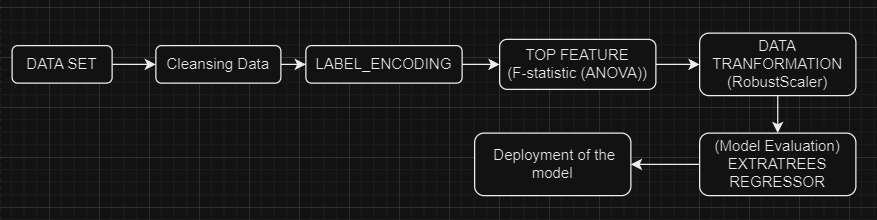

In [ ]:
import pandas as pd
file_path = r'C:\Users\PRANCHART\Desktop\Project\data_flight_price.xlsx'
data_flight_ANOVA = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
data_flight_ANOVA

In [ ]:
data_flight_ANOVA_drop = data_flight.drop(columns=['Unnamed: 0','flight'])
data_flight_ANOVA_drop

In [ ]:
from sklearn import preprocessing

for col in data_flight_ANOVA_drop.select_dtypes(include=['object']).columns:
    print(f"{col}: {data_flight_ANOVA_drop[col].unique()}")

for col in data_flight_ANOVA_drop.select_dtypes(include=['object']).columns:

    data_flight_ANOVA_drop[col].fillna('unknown', inplace=True)

    data_flight_ANOVA_drop[col] = data_flight_ANOVA_drop[col].astype(str)

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(data_flight_ANOVA_drop[col].unique())

    data_flight_ANOVA_drop[col] = label_encoder.transform(data_flight_ANOVA_drop[col])

    print(f"{col}: {data_flight_ANOVA_drop[col].unique()}")

# The evaluation of feature selection for high-impact factors using the F-statistic (ANOVA) statistical test.

In [ ]:
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
Y = data_flight_ANOVA_drop["price"]
X = data_flight_ANOVA_drop.drop(["price"], axis=1)

num_features_to_select = 6
selected_features = SelectKBest(f_regression, k=num_features_to_select).fit(X, Y)

selected_feature_indices = selected_features.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected features:", selected_feature_names)

selected_data = X[selected_feature_names]
print(selected_data.head())

The ANOVA statistical test reveals that the factors influencing price changes are now identified as 'airline,' 'departure_time,' 'stops,' 'class,' 'duration,' and 'days_left'.

In [ ]:
selected_data = [col for col in data_flight_ANOVA_drop.columns if col not in selected_data and col != 'price']
data_flight_ANOVA_drop.drop(selected_data, axis=1, inplace=True)
data_flight_ANOVA_drop

In [ ]:
X_A=data_flight_ANOVA_drop.drop(columns='price')
Y_A=data_flight_ANOVA_drop['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_A,y_train_A,x_test_A,y_test_A=train_test_split(X_A, Y_A, train_size = 0.8, test_size = 0.2, random_state = 7)

In [ ]:
x_train_A=data_flight_ANOVA_drop.drop(columns='price')
y_train_A=data_flight_ANOVA_drop['price']
x_test_A=data_flight_ANOVA_drop.drop(columns='price')
y_test_A=data_flight_ANOVA_drop['price']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_ET_A = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_ET_A.fit(x_train_A,y_train_A)

In [ ]:
y_pred_ET_A=model_ET_A.predict(x_test_A)
y_pred_ET_A

In [ ]:
mse_ET_A = mean_squared_error(y_test_A, y_pred_ET_A)
mae_ET_A = mean_absolute_error(y_test_A, y_pred_ET_A)
rmse_ET_A = mean_squared_error(y_test_A, y_pred_ET_A, squared=False)
r2_ET_A= r2_score(y_test_A, y_pred_ET_A)

print(f'Mean Squared Error (MSE)_Etree: {mse_ET_A}')
print(f'Mean Absolute Error (MAE)_Etree: {mae_ET_A}')
print(f'Root Mean Squared Error (RMSE)_Etree: {rmse_ET_A}')
print(f'R-squared (R2)_Etree: {r2_ET_A}')

After applying the ANOVA test for feature selection, the ExtraTreesRegressor model performance metrics are improved as follows:
Mean Squared Error (MSE): 10,541,955.09
Mean Absolute Error (MAE): 1,442.14
Root Mean Squared Error (RMSE): 3,246.84
R-squared (R2): **0.9795**

In comparison to the original testing with the Lasso Model:
Mean Squared Error (MSE): 10,863,099.35
Mean Absolute Error (MAE): 1,479.75
Root Mean Squared Error (RMSE): 3,295.92
R-squared (R2): **0.9789**
The updated results show a reduction in MSE, MAE, and RMSE, and an improvement in R-squared (R2), indicating enhanced predictive performance after feature selection using the ANOVA test.

In [ ]:
data_flight_ANOVA_drop.rename(columns={'class': 'class_type'}, inplace=True)
data_flight_ANOVA_drop

# RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
columns_to_scale = ['duration', 'days_left', 'price']

# Fit and transform the data using RobustScaler
robust_scaled_data = robust_scaler.fit_transform(data_flight_ANOVA_drop[columns_to_scale])
data_flight_ANOVA_drop[columns_to_scale] = robust_scaled_data

In [ ]:
from sklearn.preprocessing import RobustScaler
# ค่า median และ IQR สำหรับแต่ละคอลัมน์ที่ปรับขนาด
duration_median = robust_scaler.center_[0]
duration_iqr = robust_scaler.scale_[0]
days_left_median = robust_scaler.center_[1]
days_left_iqr = robust_scaler.scale_[1]
price_median = robust_scaler.center_[2]
price_iqr = robust_scaler.scale_[2]

In [ ]:
data_flight_ANOVA_drop

In [ ]:
X_A=data_flight_ANOVA_drop.drop(columns='price')
Y_A=data_flight_ANOVA_drop['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_A,y_train_A,x_test_A,y_test_A=train_test_split(X_A, Y_A, train_size = 0.8, test_size = 0.2, random_state = 7)

In [ ]:
x_train_A=data_flight_ANOVA_drop.drop(columns='price')
y_train_A=data_flight_ANOVA_drop['price']
x_test_A=data_flight_ANOVA_drop.drop(columns='price')
y_test_A=data_flight_ANOVA_drop['price']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_ET_A = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_ET_A.fit(x_train_A,y_train_A)

In [ ]:
y_pred_ET_A=model_ET_A.predict(x_test_A)
y_pred_ET_A

In [ ]:
mse_ET_A = mean_squared_error(y_test_A, y_pred_ET_A)
mae_ET_A = mean_absolute_error(y_test_A, y_pred_ET_A)
rmse_ET_A = mean_squared_error(y_test_A, y_pred_ET_A, squared=False)
r2_ET_A= r2_score(y_test_A, y_pred_ET_A)

print(f'Mean Squared Error (MSE)_Etree: {mse_ET_A}')
print(f'Mean Absolute Error (MAE)_Etree: {mae_ET_A}')
print(f'Root Mean Squared Error (RMSE)_Etree: {rmse_ET_A}')
print(f'R-squared (R2)_Etree: {r2_ET_A}')

After the data is scaled using the RobustScaler preprocessing step, the ExtraTreesRegressor model achieves the following performance metrics:

Mean Squared Error (MSE): 0.0074
Mean Absolute Error (MAE): 0.0382
Root Mean Squared Error (RMSE): 0.0860
R-squared (R2): 0.9795
These results indicate a significant improvement in model performance, with lower error values, after applying the RobustScaler preprocessing step

# Deployment of the model

In [ ]:
def predict_ticket_price(airline,departure_time, stops, class_type, duration, days_left):
    # Scaling duration and days_left with RobustScaler
    scaled_duration = (duration - duration_median) / duration_iqr
    scaled_days_left = (days_left - days_left_median) / days_left_iqr

    input_data = [airline, departure_time, stops, class_type, scaled_duration, scaled_days_left]

    
    predicted_price_scaled = model_ET_A.predict([input_data])[0]

  
    reversed_predicted_price = predicted_price_scaled * price_iqr + price_median

    return reversed_predicted_price

predicted_price = predict_ticket_price('5', '4', '1', '1',25, 25)

print(f'Predicted ticket price: {predicted_price}')

In [ ]:
df_ET = pd.DataFrame({'Actual': y_test_A.to_numpy().flatten(), 'Predicted':y_pred_ET_A.flatten()})

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Actual', y='Predicted', data=df_ET)
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

# Conclusion

Based on the comprehensive analysis, it is evident that all factors have an impact on flight ticket prices. The top 6 influential factors, ranked in descending order, are airline, departure time, stops, class type, duration, and days left. In this data processing iteration, it is advisable to perform data preprocessing, specifically **RobustScaler**, to minimize the data distribution concerning high or low values.

The chosen model for prediction is **ExtraTreesRegressor**, as it demonstrates higher accuracy compared to Linear Regression. Additionally, the use of Analysis of Variance **(ANOVA)** is recommended for selecting the most impactful factors, given its enhanced performance.

It is crucial to emphasize that the selection of a model and factors should align with the suitability of the dataset under analysis. Further experimentation can involve testing all factors in the model, exploring alternative scaling methods, and considering other models to optimize prediction accuracy.